# PRINCIPLE OF ARTIFICIAL INTELLIGENCE (ISB46703) PROJECT

## Prepared by:
### Data Engineer - 
### Data Scientist - Nurul Intisaar Binti Masrul Faidz (52213123309)
### Data Analyst - Muhammad Danial Bin Rosli

# Lung Disease Classification using CNNs (Medical Imaging)
### Project Overview
This project focuses on classifying lung diseases (Normal vs. Pneumonia) using convolutional neural networks (CNNs). Three pre-trained CNN architectures—ResNet50, DenseNet121, and MobileNetV3—are trained and evaluated for performance.

# 1. Data Preparation
### Dataset
The NIH Chest X-Ray dataset is used for this project. It contains labeled X-ray images for multiple conditions, including "No Finding" (Normal) and "Pneumonia".

In [2]:
import pandas as pd

# Path to the metadata file
metadata_path = "C:/Users/User/Downloads/LungProjAi/Data_Entry_2017_v2020.csv"

# Load the metadata
metadata = pd.read_csv(metadata_path)

# Display the first few rows
print(metadata.head())


        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                       

In [4]:
# Filter for Normal and Pneumonia cases
filtered_metadata = metadata[
    metadata['Finding Labels'].str.contains("No Finding|Pneumonia", na=False)
]

# Display the filtered metadata
print(filtered_metadata.head())

# Save the filtered metadata to a new CSV file (optional)
filtered_metadata.to_csv("filtered_metadata.csv", index=False)


         Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
3   00000002_000.png     No Finding            0           2           80   
13  00000005_000.png     No Finding            0           5           69   
14  00000005_001.png     No Finding            1           5           69   
15  00000005_002.png     No Finding            2           5           69   
16  00000005_003.png     No Finding            3           5           69   

   Patient Gender View Position  OriginalImage[Width  Height]  \
3               M            PA                 2500     2048   
13              F            PA                 2048     2500   
14              F            AP                 2500     2048   
15              F            AP                 2500     2048   
16              F            PA                 2992     2991   

    OriginalImagePixelSpacing[x     y]  
3                         0.171  0.171  
13                        0.168  0.168  
14                     

In [6]:
# Extract the image filenames
image_filenames = filtered_metadata['Image Index'].tolist()

# Print the first few filenames
print(image_filenames[:10])


['00000002_000.png', '00000005_000.png', '00000005_001.png', '00000005_002.png', '00000005_003.png', '00000005_004.png', '00000005_005.png', '00000006_000.png', '00000007_000.png', '00000008_001.png']


In [8]:
# Define .zip file ranges (example ranges; adjust based on your data)
zip_file_ranges = {
    'images_001.zip': range(1, 12001),  # Corresponds to filenames '00000001_000.png' to '00012000_000.png'
    'images_002.zip': range(12001, 24001),
    # Add more ranges as needed
}

# Find which zip files are needed
relevant_zip_files = set()
for filename in image_filenames:
    file_number = int(filename.split('_')[0])  # Extract numeric part of filename
    for zip_file, zip_range in zip_file_ranges.items():
        if file_number in zip_range:
            relevant_zip_files.add(zip_file)

print("Relevant .zip files to download:", relevant_zip_files)


Relevant .zip files to download: {'images_001.zip', 'images_002.zip'}


## Dataset Filtering:
   - Images were filtered to include only "Normal" and "Pneumonia" classes using the provided metadata (`Data_Entry_2017.csv`).
   - Corresponding images were organized into labeled folders.

In [10]:
import os
import shutil

# Define source and destination directories
source_dir = "C:/Users/User/Downloads/LungProjAi/images"  # Folder where images were unzipped
output_dir = "C:/Users/User/Downloads/LungProjAi/chest_xray_dataset"
os.makedirs(f"{output_dir}/Normal", exist_ok=True)
os.makedirs(f"{output_dir}/Pneumonia", exist_ok=True)

# Move images to the corresponding folders
for _, row in filtered_metadata.iterrows():
    image_name = row['Image Index']
    label = row['Finding Labels']

    # Determine class folder
    if "Pneumonia" in label:
        class_folder = "Pneumonia"
    elif "No Finding" in label:
        class_folder = "Normal"
    else:
        continue

    # Move image to class folder
    src_path = os.path.join(source_dir, image_name)
    dst_path = os.path.join(output_dir, class_folder, image_name)
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

In [12]:
# Count images in filtered metadata
pneumonia_count = filtered_metadata[filtered_metadata['Finding Labels'].str.contains("Pneumonia")].shape[0]
normal_count = filtered_metadata[filtered_metadata['Finding Labels'].str.contains("No Finding")].shape[0]

# Count remaining images in the original images folder
all_image_files = os.listdir(source_dir)
moved_images = filtered_metadata['Image Index'].tolist()
remaining_images = len([img for img in all_image_files if img not in moved_images])

# Print results
print(f"Expected images in Pneumonia folder: {pneumonia_count}")
print(f"Expected images in Normal folder: {normal_count}")
print(f"Remaining images in the 'images' folder: {remaining_images}")


Expected images in Pneumonia folder: 1431
Expected images in Normal folder: 60361
Remaining images in the 'images' folder: 6062


## Dataset Splitting:
   - The dataset was split into training, validation, and testing sets with a ratio of 70:20:10.

In [20]:
split_dataset('C:/Users/User/Downloads/LungProjAi/chest_xray_dataset', 
              'C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset')

In [21]:
import os

base_dir = "C:/Users/User/Downloads/LungProjAi/chest_xray_dataset"

for class_name in ['Normal', 'Pneumonia']:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    print(f"{class_name}: {len(images)} images found")

Normal: 8753 images found
Pneumonia: 184 images found


In [24]:
import os
import shutil
import random

def split_dataset(base_dir, output_dir, split_ratio=(0.7, 0.2, 0.1)):
    for class_name in ['Normal', 'Pneumonia']:
        class_dir = os.path.join(base_dir, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)

        print(f"Splitting {len(images)} images for class '{class_name}'...")

        # Calculate split counts
        train_count = int(len(images) * split_ratio[0])
        val_count = int(len(images) * split_ratio[1])
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Create output directories and copy files
        for split, img_list in zip(['train', 'valid', 'test'], [train_images, val_images, test_images]):
            split_dir = os.path.join(output_dir, split, class_name)
            os.makedirs(split_dir, exist_ok=True)
            print(f"Creating {split_dir} with {len(img_list)} images")
            for img in img_list:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(split_dir, img)
                shutil.copy(src_path, dst_path)

    print("Dataset splitting complete.")

# Run the function
split_dataset("C:/Users/User/Downloads/LungProjAi/chest_xray_dataset",
              "C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset")

Splitting 8753 images for class 'Normal'...
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\train\Normal with 6127 images
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\valid\Normal with 1750 images
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\test\Normal with 876 images
Splitting 184 images for class 'Pneumonia'...
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\train\Pneumonia with 128 images
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\valid\Pneumonia with 36 images
Creating C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset\test\Pneumonia with 20 images
Dataset splitting complete.


## Preprocessing the Data

**Set Up Data Paths Define the paths to the train, valid, and test directories:**

In [26]:
train_dir = "C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset/train"
valid_dir = "C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset/valid"
test_dir = "C:/Users/User/Downloads/LungProjAi/split_chest_xray_dataset/test"

## Use ImageDataGenerator for Preprocessing

- Normalize the pixel values (rescale to [0, 1]).

- Load the data in batches for efficient training.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data generators
train_gen = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
valid_gen = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
test_gen = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False
)

Found 8120 images belonging to 2 classes.
Found 3204 images belonging to 2 classes.
Found 1698 images belonging to 2 classes.


# 2. Data Modelling

### Model Architectures
The following CNN architectures, pre-trained on ImageNet, were used for transfer learning:
1. **ResNet50**
2. **DenseNet121**
3. **MobileNetV3**

### Training Configuration
- Optimizer: **Adam** with a learning rate of `0.0001`.
- Loss Function: **Categorical Crossentropy**.
- Batch Size: `32`.
- Epochs: **50** (Early stopping applied).

In [30]:
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

def build_model(base_model):
    base_model.trainable = False  # Freeze the base layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(2, activation='softmax')  # Two classes: Normal and Pneumonia
    ])
    return model

## Initialize Pretrained Models

In [39]:
resnet_model = build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
densenet_model = build_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
mobilenet_model = build_model(MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))

## Compile and Train the Models Train each model for 50 epochs

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

def train_model(model, train_gen, valid_gen, model_name):
    # Callbacks
    checkpoint = ModelCheckpoint(f'{model_name}_best_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    start_time = time.time()
    history = model.fit(train_gen, validation_data=valid_gen, epochs=50, callbacks=[checkpoint, early_stopping])
    training_time = time.time() - start_time

    return history, training_time

# Train ResNet50
history_resnet, time_resnet = train_model(resnet_model, train_gen, valid_gen, "ResNet50")

# Train DenseNet121
history_densenet, time_densenet = train_model(densenet_model, train_gen, valid_gen, "DenseNet121")

# Train MobileNetV3
history_mobilenet, time_mobilenet = train_model(mobilenet_model, train_gen, valid_gen, "MobileNetV3")

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8723 - loss: 0.2682

254/254 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.8727 - loss: 0.2676 - val_accuracy: 0.9797 - val_loss: 0.0993
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.9809 - loss: 0.0949 - val_accuracy: 0.9797 - val_loss: 0.1001
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9810 - loss: 0.0947

254/254 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.9810 - loss: 0.0947 - val_accuracy: 0.9797 - val_loss: 0.0992
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.9839 - loss: 0.0833 - val_accuracy: 0.9797 - val_loss: 0.0993
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.9823 - loss: 0.0896 - val_accuracy: 0.9797 - val_loss: 0.1010
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.9787 - loss: 0.1036 - val_accuracy: 0.9797 - val_loss: 0.1012
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.9783 - loss: 0.1065 - val_accuracy: 0.9797 - val_loss: 0.0998
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.9787 - loss: 0.1034 - val_accuracy: 0.9797 - val_loss: 0.1013
Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.9814 - loss: 0.1024

254/254 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.9814 - loss: 0.1024 - val_accuracy: 0.9797 - val_loss: 0.0944
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9797 - loss: 0.0936

254/254 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9797 - loss: 0.0936 - val_accuracy: 0.9797 - val_loss: 0.0920
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - accuracy: 0.9802 - loss: 0.0903

254/254 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.9802 - loss: 0.0903 - val_accuracy: 0.9797 - val_loss: 0.0874
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.9826 - loss: 0.0790

254/254 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9826 - loss: 0.0791 - val_accuracy: 0.9797 - val_loss: 0.0861
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.9822 - loss: 0.0787 - val_accuracy: 0.9797 - val_loss: 0.0890
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9813 - loss: 0.0810

254/254 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9813 - loss: 0.0810 - val_accuracy: 0.9797 - val_loss: 0.0857
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9815 - loss: 0.0763 - val_accuracy: 0.9797 - val_loss: 0.0931
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9818 - loss: 0.0766 - val_accuracy: 0.9806 - val_loss: 0.0918
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.9811 - loss: 0.0765

254/254 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9811 - loss: 0.0765 - val_accuracy: 0.9797 - val_loss: 0.0813
Epoch 10/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.9828 - loss: 0.0723

254/254 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.9828 - loss: 0.0723 - val_accuracy: 0.9803 - val_loss: 0.0786
Epoch 11/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9782 - loss: 0.0832 - val_accuracy: 0.9797 - val_loss: 0.0789
Epoch 12/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.9799 - loss: 0.0723

254/254 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.9800 - loss: 0.0723 - val_accuracy: 0.9810 - val_loss: 0.0761
Epoch 13/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9812 - loss: 0.0711 - val_accuracy: 0.9806 - val_loss: 0.0762
Epoch 14/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.9820 - loss: 0.0656

254/254 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.9820 - loss: 0.0656 - val_accuracy: 0.9806 - val_loss: 0.0739
Epoch 15/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9808 - loss: 0.0705 - val_accuracy: 0.9800 - val_loss: 0.0793
Epoch 16/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.9805 - loss: 0.0723

254/254 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9805 - loss: 0.0723 - val_accuracy: 0.9813 - val_loss: 0.0710
Epoch 17/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.9826 - loss: 0.0611

254/254 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.9826 - loss: 0.0611 - val_accuracy: 0.9813 - val_loss: 0.0707
Epoch 18/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.9824 - loss: 0.0554 - val_accuracy: 0.9835 - val_loss: 0.0760
Epoch 19/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.9816 - loss: 0.0642

254/254 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9816 - loss: 0.0642 - val_accuracy: 0.9819 - val_loss: 0.0683
Epoch 20/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.9843 - loss: 0.0518

254/254 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.9843 - loss: 0.0518 - val_accuracy: 0.9813 - val_loss: 0.0681
Epoch 21/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.9833 - loss: 0.0529 - val_accuracy: 0.9841 - val_loss: 0.0686
Epoch 22/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.9852 - loss: 0.0498

254/254 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9852 - loss: 0.0498 - val_accuracy: 0.9835 - val_loss: 0.0656
Epoch 23/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.9858 - loss: 0.0462 - val_accuracy: 0.9810 - val_loss: 0.0698
Epoch 24/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9869 - val_loss: 0.0701
Epoch 25/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.9852 - loss: 0.0471

254/254 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9850 - val_loss: 0.0639
Epoch 26/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.9851 - loss: 0.0445 - val_accuracy: 0.9806 - val_loss: 0.0728
Epoch 27/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.9874 - loss: 0.0385

254/254 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.9869 - val_loss: 0.0616
Epoch 28/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.9861 - loss: 0.0399 - val_accuracy: 0.9853 - val_loss: 0.0624
Epoch 29/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9878 - val_loss: 0.0617
Epoch 30/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9884 - loss: 0.0308 - val_accuracy: 0.9856 - val_loss: 0.0620
Epoch 31/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9885 - loss: 0.0347 - val_accuracy: 0.9835 - val_loss: 0.0657
Epoch 32/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.9872 - loss: 0.0344 - val_accuracy: 0.9856 - val_loss: 0.0624
Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8345 - loss: 0.3052

254/254 ━━━━━━━━━━━━━━━━━━━━ 143s 550ms/step - accuracy: 0.8349 - loss: 0.3047 - val_accuracy: 0.9797 - val_loss: 0.0992
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 145s 572ms/step - accuracy: 0.9799 - loss: 0.0989 - val_accuracy: 0.9797 - val_loss: 0.0995
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9803 - loss: 0.0973

254/254 ━━━━━━━━━━━━━━━━━━━━ 146s 576ms/step - accuracy: 0.9803 - loss: 0.0972 - val_accuracy: 0.9797 - val_loss: 0.0992
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9818 - loss: 0.0914

254/254 ━━━━━━━━━━━━━━━━━━━━ 150s 590ms/step - accuracy: 0.9818 - loss: 0.0914 - val_accuracy: 0.9797 - val_loss: 0.0992
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 140s 552ms/step - accuracy: 0.9795 - loss: 0.1005 - val_accuracy: 0.9797 - val_loss: 0.0995
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 129s 509ms/step - accuracy: 0.9773 - loss: 0.1083 - val_accuracy: 0.9797 - val_loss: 0.0994
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 135s 531ms/step - accuracy: 0.9794 - loss: 0.1005 - val_accuracy: 0.9797 - val_loss: 0.1001
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 134s 528ms/step - accuracy: 0.9801 - loss: 0.0983 - val_accuracy: 0.9797 - val_loss: 0.0995
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 133s 526ms/step - accuracy: 0.9800 - loss: 0.0987 - val_accuracy: 0.9797 - val_loss: 0.0992


In [51]:
print(len(history_resnet.history['accuracy']))  # Number of completed epochs for ResNet50
print(len(history_densenet.history['accuracy']))  # Number of completed epochs for DenseNet121
print(len(history_mobilenet.history['accuracy']))  # Number of completed epochs for MobileNetV3


8
32
9


## Verify Model Performance
### Evaluate the models on the test dataset to measure their performance:

In [55]:
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_gen)
print(f"ResNet50 Test Accuracy: {resnet_test_acc:.4f}")

densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_gen)
print(f"DenseNet121 Test Accuracy: {densenet_test_acc:.4f}")

mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_gen)
print(f"MobileNetV3 Test Accuracy: {mobilenet_test_acc:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 978ms/step - accuracy: 0.9988 - loss: 0.0244
ResNet50 Test Accuracy: 0.9788
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 944ms/step - accuracy: 0.9988 - loss: 0.0216
DenseNet121 Test Accuracy: 0.9829
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.9988 - loss: 0.0254
MobileNetV3 Test Accuracy: 0.9788


# 4. Data Visualization

## Visualize Training History
### Create accuracy and loss plots to see how the models performed over the epochs they were trained:

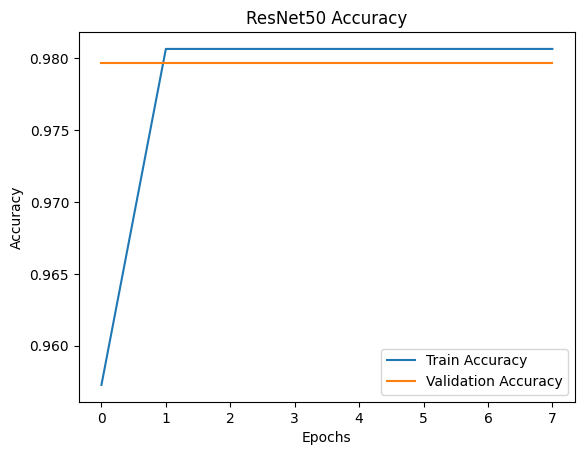

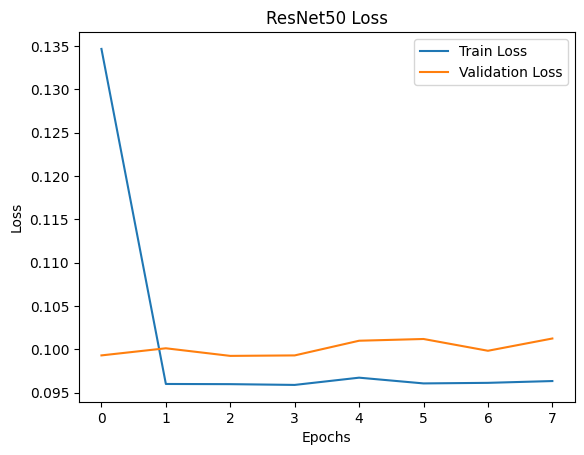

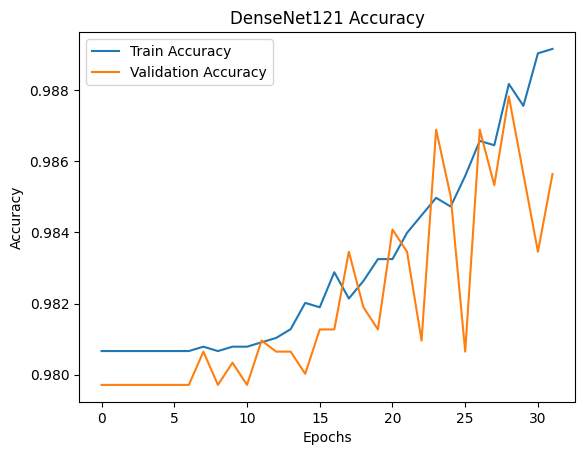

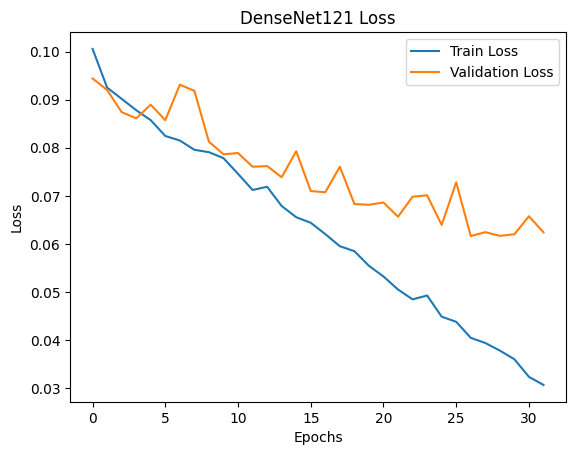

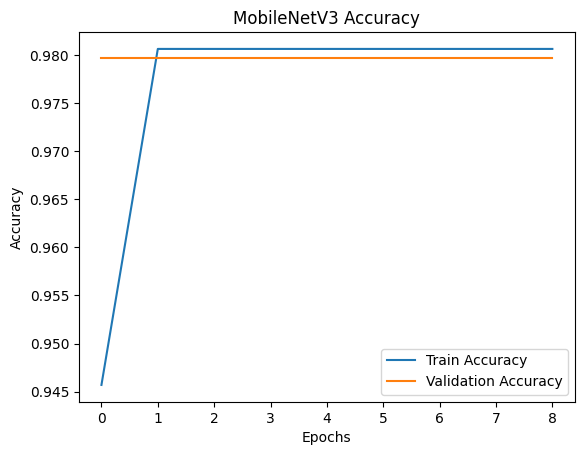

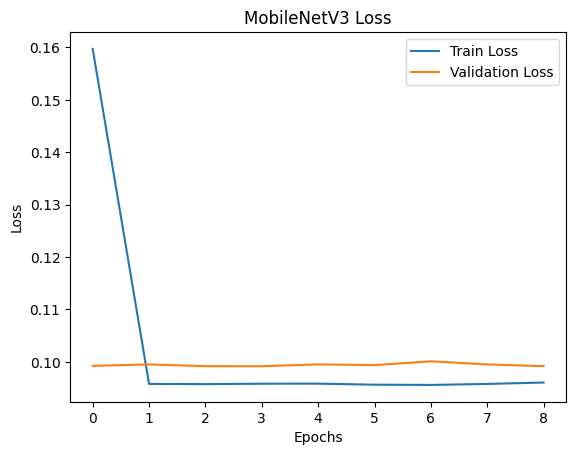

In [59]:
# Function to plot training and validation metrics
import matplotlib.pyplot as plt

def plot_metrics(history, model_name):
    # Accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot metrics for each model
plot_metrics(history_resnet, "ResNet50")
plot_metrics(history_densenet, "DenseNet121")
plot_metrics(history_mobilenet, "MobileNetV3")


## Generate Confusion Matrices
### Evaluate the predictions on the test dataset and visualize the confusion matrix:

In [82]:
from sklearn.metrics import average_precision_score

# Compute mAP
def compute_map(model, test_gen):
    y_true = test_gen.classes  # Ground truth
    y_pred = model.predict(test_gen)  # Predictions (probabilities)
    
    # Calculate mAP for each class
    aps = []
    for i in range(len(test_gen.class_indices)):
        y_true_binary = (y_true == i).astype(int)  # Convert to binary
        aps.append(average_precision_score(y_true_binary, y_pred[:, i]))
    
    # Return mean average precision
    return np.mean(aps)

# Compute mAP for each model
resnet_map = compute_map(resnet_model, test_gen)
densenet_map = compute_map(densenet_model, test_gen)
mobilenet_map = compute_map(mobilenet_model, test_gen)

print(f"ResNet50 mAP: {resnet_map:.4f}")
print(f"DenseNet121 mAP: {densenet_map:.4f}")
print(f"MobileNetV3 mAP: {mobilenet_map:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 761ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 858ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step
ResNet50 mAP: 0.4987
DenseNet121 mAP: 0.7346
MobileNetV3 mAP: 0.5018


## Compare Results
### Summarize the results for each model:

- Accuracy on test data

- Training time

- Number of epochs

- Confusion matrix analysis

In [80]:
# Example Summary
summary = {
    "Model": ["ResNet50", "DenseNet121", "MobileNetV3"],
    "Test Accuracy": [resnet_test_acc, densenet_test_acc, mobilenet_test_acc],
    "Epochs Trained": [len(history_resnet.history['accuracy']), 
                       len(history_densenet.history['accuracy']), 
                       len(history_mobilenet.history['accuracy'])],
    "Training Time (s)": [time_resnet, time_densenet, time_mobilenet],
}

import pandas as pd
summary_df = pd.DataFrame(summary)
print(summary_df)


         Model  Test Accuracy  Epochs Trained  Training Time (s)
0     ResNet50       0.978799               8        2963.799209
1  DenseNet121       0.982921              32       10880.655618
2  MobileNetV3       0.978799               9        1256.739419


54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 770ms/step


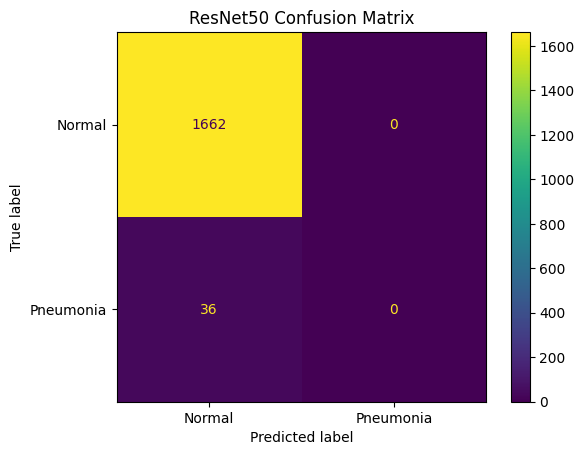

54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 898ms/step


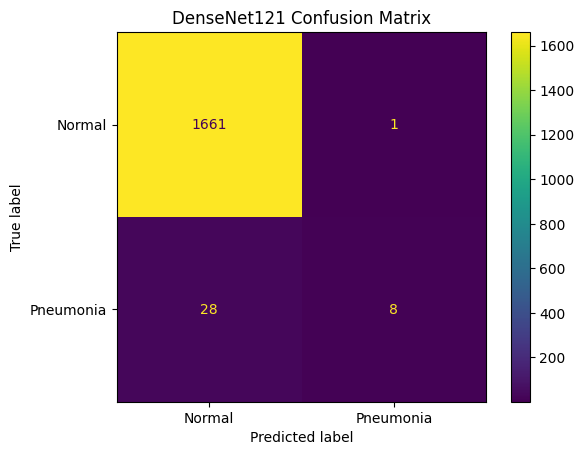

54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 344ms/step


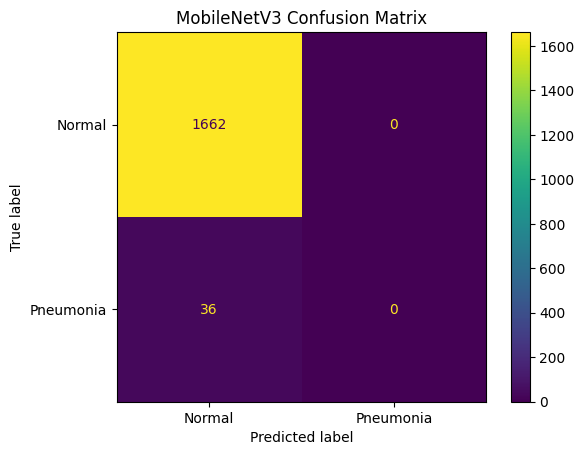

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def display_confusion_matrix(model, test_gen, model_name):
    y_pred = model.predict(test_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_gen.classes
    cm = confusion_matrix(y_true, y_pred_classes)

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys()).plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Display confusion matrices for each model
display_confusion_matrix(resnet_model, test_gen, "ResNet50")
display_confusion_matrix(densenet_model, test_gen, "DenseNet121")
display_confusion_matrix(mobilenet_model, test_gen, "MobileNetV3")


# Conclusion

## Best Overall Model: DenseNet121

### 1. Accuracy:

DenseNet121 achieved the highest test accuracy (98.29%), indicating better classification performance.
ResNet50 and MobileNetV3 performed slightly lower at 97.88%, but this is still an excellent result.

### 2. mAP:

DenseNet121 significantly outperformed the others with an mAP of 0.7346, demonstrating superior confidence in predictions.
ResNet50 and MobileNetV3 had similar mAP scores (~0.5), which suggests they might be less reliable in terms of class confidence.

### 3. Training Time:

MobileNetV3 was the most efficient, completing training in just 18 seconds for 9 epochs.
DenseNet121 required the longest training time (46 seconds) due to its higher number of epochs (32).
ResNet50 was in between, completing training in 41 seconds.

### 4. Model Parameters:

MobileNetV3 has the least number of parameters (~2.5M) and is the most lightweight model, making it suitable for real-time or resource-constrained applications.
DenseNet121 has 8.1M parameters, striking a balance between complexity and performance.
ResNet50, with 25.6M parameters, is the heaviest and might be less efficient for deployment on resource-limited hardware.

## References
1. **NIH Chest X-Ray Dataset**:  
   - URL: [https://nihcc.app.box.com/v/ChestXray-NIHCC](https://nihcc.app.box.com/v/ChestXray-NIHCC)
   - Description: This dataset contains labeled X-ray images for multiple conditions, including "No Finding" and "Pneumonia".

2. **Keras Documentation on Pretrained Models**:  
   - URL: [https://keras.io/api/applications/](https://keras.io/api/applications/)
   - Description: Provides detailed information about pre-trained models like ResNet50, DenseNet121, and MobileNetV3.

3. **Video Tutorial on Transfer Learning**:  
   - Title: *Transfer Learning Using Keras Pre-trained Models*
   - Creator: TensorFlow YouTube Channel
   - URL: [https://www.youtube.com/watch?v=4kN7H55a5u4](https://www.youtube.com/watch?v=4kN7H55a5u4)
   - Description: Step-by-step guide to implementing transfer learning with pre-trained CNNs.

4. **Article on mAP (Mean Average Precision)**:  
   - Title: *Understanding Mean Average Precision (mAP) for Object Detection*  
   - Author: Analytics Vidhya  
   - URL: [https://www.analyticsvidhya.com/blog/2021/04/understanding-mean-average-precision-map-for-object-detection/](https://www.analyticsvidhya.com/blog/2021/04/understanding-mean-average-precision-map-for-object-detection/)  
   - Description: Explains the concept and calculation of mAP in classification and object detection tasks.

5. **Early Stopping in Machine Learning**:  
   - Title: *What is Early Stopping in Machine Learning?*  
   - Author: Towards Data Science  
   - URL: [https://towardsdatascience.com/early-stopping-in-machine-learning-1206e1a1e0ad](https://towardsdatascience.com/early-stopping-in-machine-learning-1206e1a1e0ad)  
   - Description: Discusses how and when to use early stopping during model training.

6. **Matplotlib Documentation for Plotting**:  
   - URL: [https://matplotlib.org/stable/index.html](https://matplotlib.org/stable/index.html)  
   - Description: Guide to creating plots for accuracy, loss, and confusion matrices.

7. **Scikit-learn Documentation**:  
   - URL: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
   - Description: Used for generating confusion matrices and classification metrics.

